In [1]:
#coding: utf-8

In [2]:
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

from numpy import random

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def get_data(filename):
    data = load_svmlight_file(filename)
    return data[0], data[1]

In [4]:
iters = 300
X, y = get_data("housing_scale.txt")

In [5]:
X.shape

(506, 13)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.toarray()
X_test = X_test.toarray()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(354, 13)
(152, 13)
(354,)
(152,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
def train(X_train, X_test, y_train, y_test):
    #train in gradient descent
    
    train_loss = []
    dev_loss = []
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    X_test = np.append(X_test,app_test,axis=1)
    weight = random.random(size=(X_train.shape[1], 1))
    #weight = np.zeros([X_train.shape[1], 1])
    a = 0.1
    for i in range(0, iters):
        y_ = np.dot(X_train, weight)
        tmp = (y_ - y_train.reshape(-1, 1))
        loss = np.dot(tmp.T, tmp) / (2.0 * X_train.shape[0])
        train_loss.append(loss[0][0])
        
        ytest_ = np.dot(X_test, weight)
        tmp_test = (ytest_ - y_test.reshape(-1, 1))
        test_loss = np.dot(tmp_test.T, tmp_test) / (2.0 * X_test.shape[0])
        dev_loss.append(test_loss[0][0])
        
        d = tmp * X_train
        d = np.mean(d, axis=0).reshape(-1, 1)
        weight = weight - a * d
    return train_loss, dev_loss

In [8]:
train_loss, dev_loss = train(X_train, X_test, y_train, y_test)

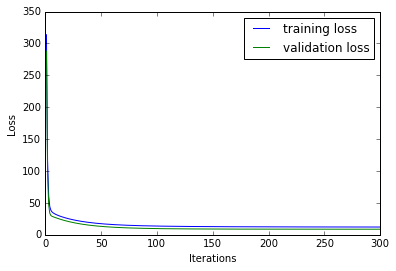

In [9]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss = np.array(train_loss)
dev_loss = np.array(dev_loss)
plt.figure(1)
plt.plot(plot_x, train_loss, label="training loss")
plt.plot(plot_x, dev_loss, label="validation loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()